In [4]:
#HSV segmentation

In [5]:
%matplotlib inline

In [6]:
from matplotlib import pyplot as plt
from skimage import data,color, exposure,feature,io,measure
from math import sqrt
from skimage.color import rgb2gray
import skimage.exposure as imexp
from PIL import Image
import numpy as np

In [7]:
#loading data

In [8]:
# im1 = Image.open('onlineSamples/textures/1.jpg')
# im2 = Image.open('onlineSamples/textures/2.jpg')
# im3 = Image.open('onlineSamples/textures/3.jpg')



onlineSamples = []
onlineHsvSamples = []

imgSamples = [];
imgHsvSamples = [];


for a in range(0,3):
    onlineSamples.append(np.array(Image.open('onlineSamples/textures/'+str(a+1)+'.jpg')))
                      
for b in range(0,3):
    onlineHsvSamples.append(color.rgb2hsv(onlineSamples[b]))

for c in range(0,18):
    imgSamples.append(np.array(Image.open('renamed-samples1/'+str(c+1)+'.bmp')))
                      
for d in range(0,18):
    imgHsvSamples.append(color.rgb2hsv(imgSamples[d]))


print(len(imgSamples))  
print(len(imgHsvSamples))  
print(len(onlineSamples))  
print(len(onlineHsvSamples))  
print(imgSamples[0].shape);
print(imgHsvSamples[0].shape);

18
18
3
3
(1080, 1920, 3)
(1080, 1920, 3)


In [9]:
#plotting

In [10]:
##saturation thresholding

In [11]:
def satThreshold(v,s):    ##return hue or intensity as dominant feature
    th = 1.0 - 0.8*v;
    if(s>th):
        return "h"
    else: 
        return "v"
    

In [12]:
def approximate(img):
    tmpImg = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            dominantVal = satThreshold(img[i,j,2],img[i,j,1])
#             print("dominantVal----"+dominantVal)
            tmpImg[i,j,:] = img[i,j,:]
            if dominantVal == "h":
                tmpImg[i,j,0] = img[i,j,0]
                tmpImg[i,j,1] = 1.0
                tmpImg[i,j,2] = 1.0
                
            else:
                tmpImg[i,j,0] = 1.0
                tmpImg[i,j,1] = 1.0
                tmpImg[i,j,2] = img[i,j,2]
        
    return tmpImg

In [13]:
##ploating online samples

In [14]:
##extrac main component

In [15]:
def extractMainComp(approx_img):
    #0.12 green , #0.67 blue , #0,1 red
      return ( (approx_img[:,:,0] < 0.3))

In [16]:
##renyi antropy

In [17]:
def extractMainHsvComp(approx_img,hsv_img):
    
    tmpImg = np.zeros(hsv_img.shape)
    for i in range(hsv_img.shape[0]):
        for j in range(hsv_img.shape[1]):
            tmpImg[i,j,:] = hsv_img[i,j,:]
            if  not approx_img[i,j]: #turn to black
                tmpImg[i,j,0] = 0.
                tmpImg[i,j,1] = 0.
                tmpImg[i,j,2] = 0.      
        
    return tmpImg

In [18]:
##extract main hsv component based on approximated image result

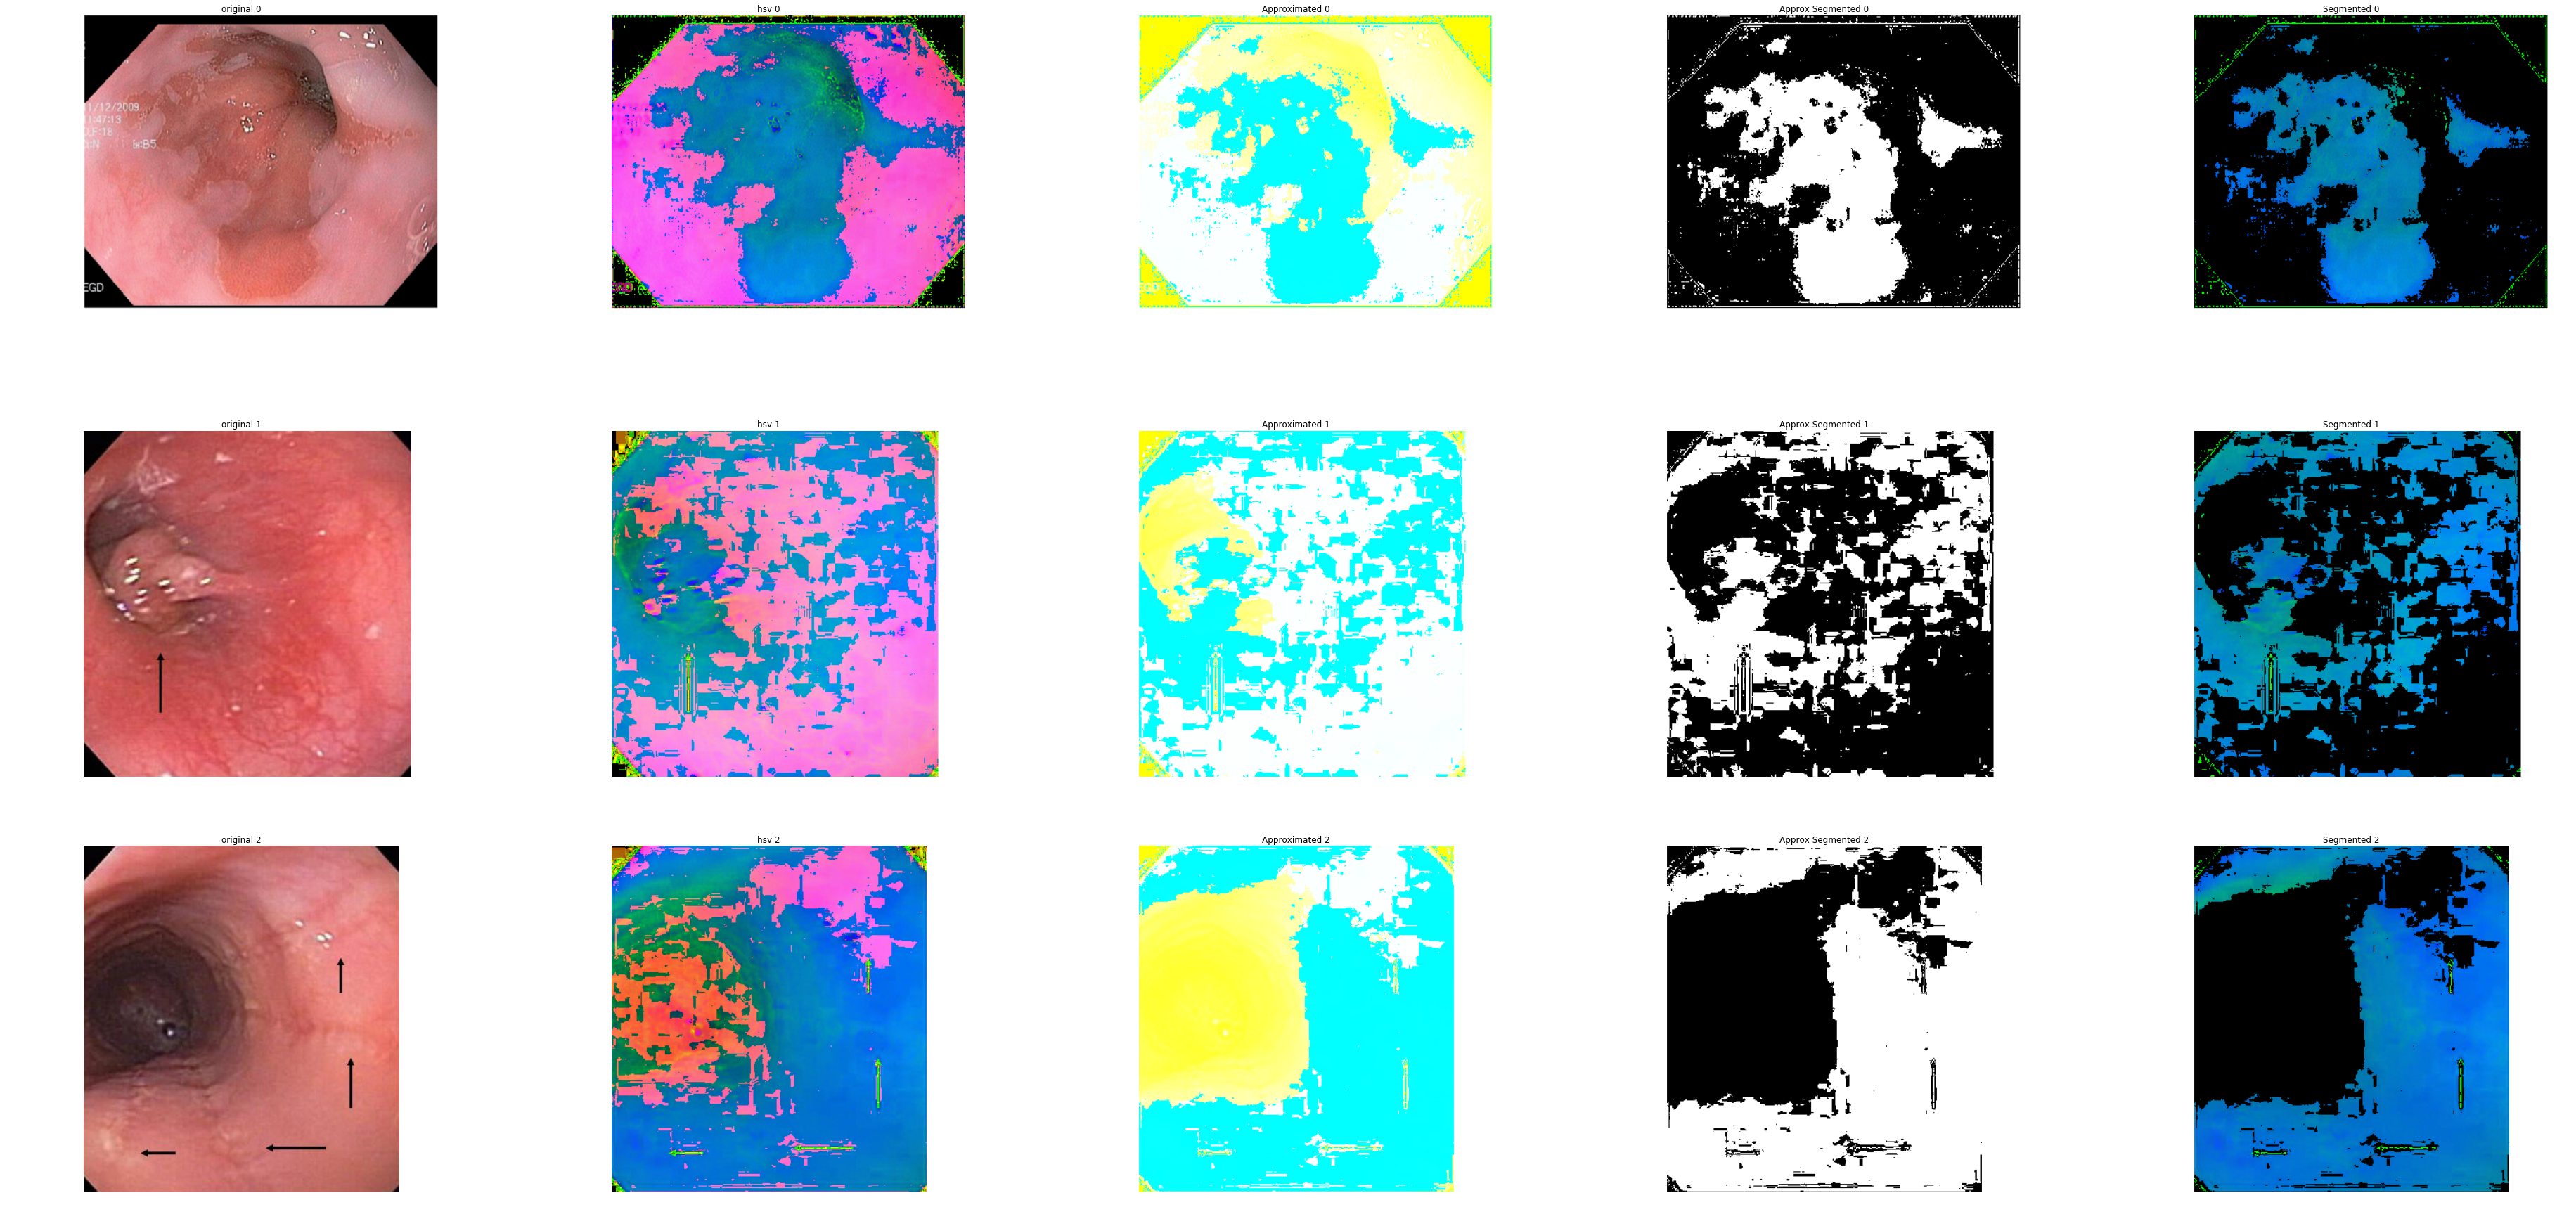

In [23]:
colnum = 5
# rownum = int(math.floor((float(len(imgSamples))/ float(colnum))+1))
rownum = len(onlineSamples)
# print(rownum)


fig, axes = plt.subplots(rownum, colnum, figsize=(65, rownum*10), sharex=True, sharey=True)
ax = axes.ravel()
index = 0


for i in range(0, len(onlineHsvSamples)):
    
    ax[index].imshow(onlineSamples[i],cmap='gray')
    ax[index].set_title("original "+str(i))
    ax[index].axis('off') 
    
    ax[index+1].imshow(onlineHsvSamples[i],cmap='gray')
    ax[index+1].set_title("hsv "+str(i))
    ax[index+1].axis('off') 
    
    ax[index+2].imshow(approximate(onlineHsvSamples[i]),cmap='gray')
    ax[index+2].set_title("Approximated "+str(i))
    ax[index+2].axis('off') 
    
    mainComp = extractMainComp(approximate(onlineHsvSamples[i]))
    ax[index+3].imshow(mainComp,cmap='gray')
    ax[index+3].set_title("Approx Segmented "+str(i))
    ax[index+3].axis('off')
    
        
    approximatedSeg = extractMainComp(approximate(onlineHsvSamples[i]))
    hsvSegmented = extractMainHsvComp(approximatedSeg,onlineHsvSamples[i])


    ax[index+4].imshow(hsvSegmented,cmap='gray')
    ax[index+4].set_title("Segmented "+str(i))
    ax[index+4].axis('off') 
    

    index +=5
    
plt.show()

In [21]:
##width contours

main comp shape
(352, 424)
main comp shape
(426, 392)
main comp shape
(416, 378)


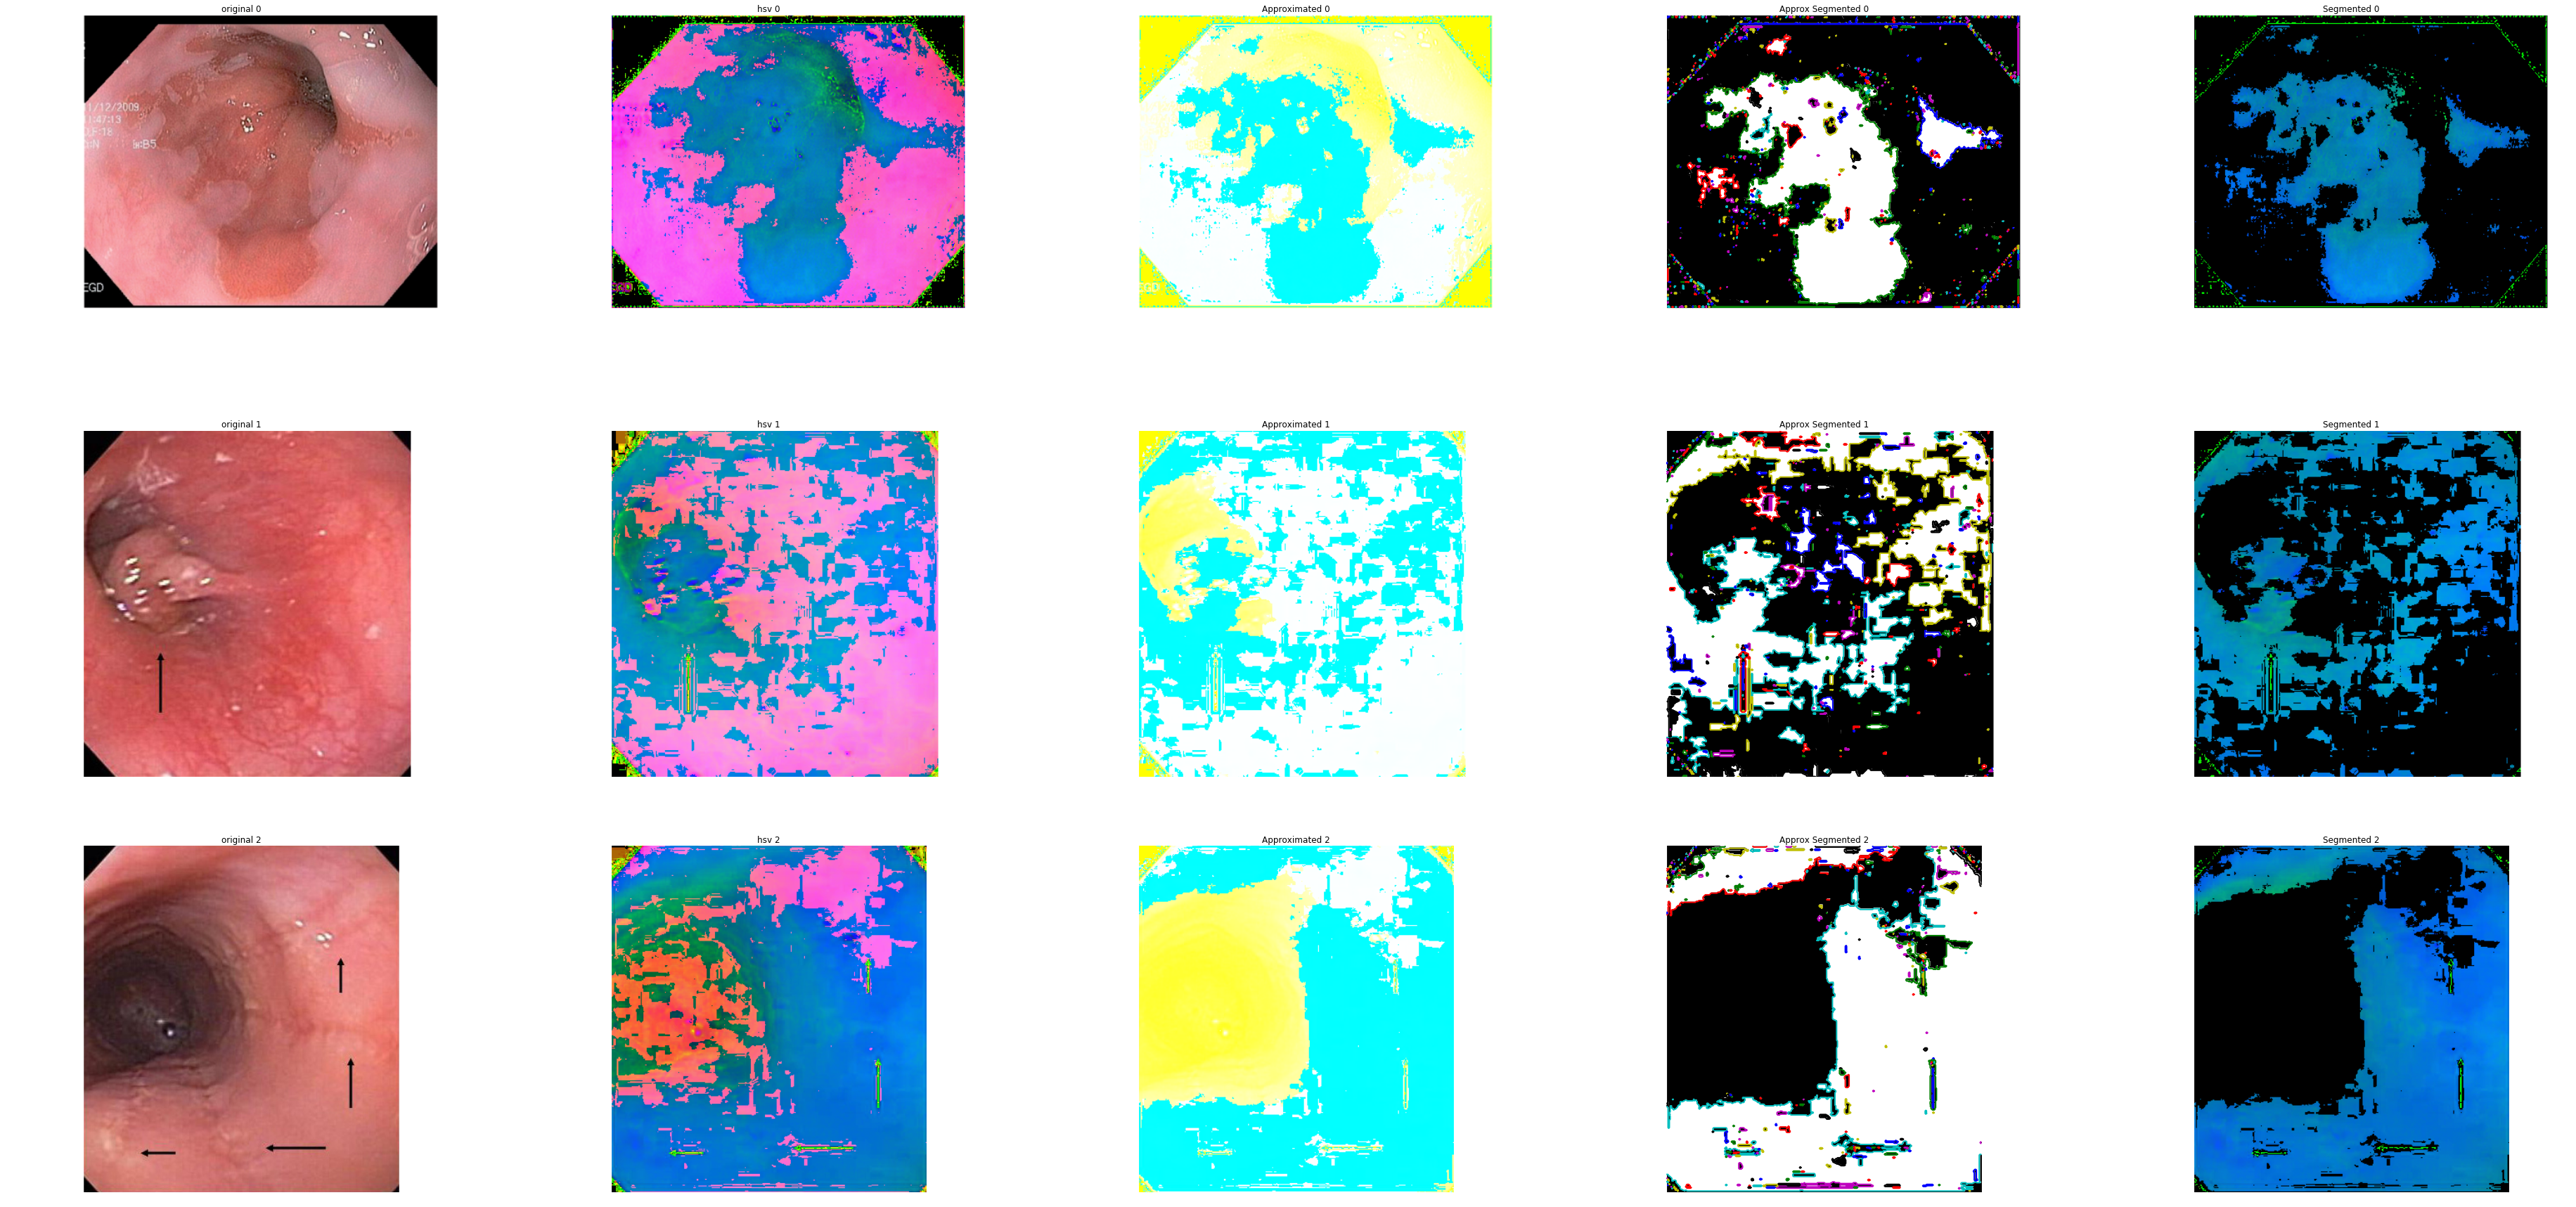

In [22]:
colnum = 5
# rownum = int(math.floor((float(len(imgSamples))/ float(colnum))+1))
rownum = len(onlineSamples)
# print(rownum)


fig, axes = plt.subplots(rownum, colnum, figsize=(65, rownum*10), sharex=True, sharey=True)
ax = axes.ravel()
index = 0


for i in range(0, len(onlineHsvSamples)):
    
    ax[index].imshow(onlineSamples[i],cmap='gray')
    ax[index].set_title("original "+str(i))
    ax[index].axis('off') 
    
    ax[index+1].imshow(onlineHsvSamples[i],cmap='gray')
    ax[index+1].set_title("hsv "+str(i))
    ax[index+1].axis('off') 
    
    ax[index+2].imshow(approximate(onlineHsvSamples[i]),cmap='gray')
    ax[index+2].set_title("Approximated "+str(i))
    ax[index+2].axis('off') 
    
    mainComp = extractMainComp(approximate(onlineHsvSamples[i]))
    ax[index+3].imshow(mainComp,cmap='gray')
    ax[index+3].set_title("Approx Segmented "+str(i))
    ax[index+3].axis('off')
    print("main comp shape")
    print(mainComp.shape)
    # Find contours at a constant value of 0.8
    contours = measure.find_contours(mainComp, 0.8)
    for n, contour in enumerate(contours):
        ax[index+3].plot(contour[:, 1], contour[:, 0], linewidth=2)

    
        
    approximatedSeg = extractMainComp(approximate(onlineHsvSamples[i]))
    hsvSegmented = extractMainHsvComp(approximatedSeg,onlineHsvSamples[i])


    ax[index+4].imshow(hsvSegmented,cmap='gray')
    ax[index+4].set_title("Segmented "+str(i))
    ax[index+4].axis('off') 
    

    index +=5
    
plt.show()